# Exploratory Data Analysis



## Data Collection

In [4]:
# aqui vão os comandos para fazer o download dos arquivos

## Data Preprocessing

In [3]:
from Bio import SeqIO
from Bio.SeqUtils import ProtParam
import pandas as pd

In [6]:
def compute_aa_composition(protein_sequence):
    analyzer = ProtParam.ProteinAnalysis(str(protein_sequence))
    return analyzer.get_amino_acids_percent()

In [15]:
df = pd.DataFrame()

handle = open('../data/raw/membrane.fasta')
parser = SeqIO.parse(handle, 'fasta')

for protein in parser:
    protein_data = compute_aa_composition(protein.seq)
    protein_data['membrane'] = 1
    df = df.append([protein_data], ignore_index=True)
    
handle = open('../data/raw/cytoplasm.fasta')
parser = SeqIO.parse(handle, 'fasta')

for protein in parser:
    protein_data = compute_aa_composition(protein.seq)
    protein_data['membrane'] = 0
    df = df.append([protein_data], ignore_index=True)

In [16]:
df

,A,C,D,E,F,G,H,I,K,L,...,N,P,Q,R,S,T,V,W,Y,membrane
0,0.308789,0.004751,0.047506,0.106888,0.014252,0.049881,0.002375,0.033254,0.156770,0.045131,...,0.026128,0.023753,0.047506,0.021378,0.052257,0.014252,0.019002,0.002375,0.011876,1
1,0.072368,0.006579,0.085526,0.052632,0.026316,0.085526,0.026316,0.085526,0.046053,0.072368,...,0.006579,0.059211,0.032895,0.065789,0.046053,0.039474,0.105263,0.026316,0.026316,1
2,0.039340,0.004230,0.075296,0.070643,0.055415,0.054569,0.009729,0.104907,0.076988,0.085871,...,0.096870,0.024112,0.024958,0.019459,0.076988,0.051607,0.047377,0.006768,0.060068,1
3,0.143204,0.021845,0.019417,0.016990,0.067961,0.131068,0.004854,0.060680,0.036408,0.109223,...,0.009709,0.063107,0.019417,0.026699,0.036408,0.063107,0.050971,0.033981,0.043689,1
4,0.111597,0.007659,0.050328,0.063457,0.020788,0.050328,0.016411,0.060175,0.025164,0.145514,...,0.038293,0.033917,0.094092,0.066740,0.066740,0.055799,0.049234,0.008753,0.013129,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.144737,0.010965,0.050439,0.074561,0.024123,0.105263,0.019737,0.067982,0.041667,0.078947,...,0.030702,0.032895,0.015351,0.070175,0.052632,0.046053,0.094298,0.004386,0.019737,0
19996,0.078431,0.015251,0.047930,0.076253,0.021786,0.089325,0.034858,0.080610,0.071895,0.067538,...,0.056645,0.026144,0.037037,0.028322,0.065359,0.069717,0.089325,0.000000,0.028322,0
19997,0.085153,0.017467,0.045852,0.080786,0.019651,0.093886,0.026201,0.069869,0.069869,0.063319,...,0.048035,0.032751,0.048035,0.037118,0.050218,0.069869,0.104803,0.000000,0.026201,0
19998,0.123620,0.011038,0.072848,0.041943,0.015453,0.103753,0.019868,0.057395,0.039735,0.088300,...,0.046358,0.039735,0.037528,0.057395,0.028698,0.075055,0.108168,0.006623,0.019868,0


## Exploratory Data Analysis

In [17]:
df_grouped = df.groupby('membrane').mean()
df_grouped

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
membrane,,,,,,,,,,,,,,,,,,,,
0,0.099596,0.011595,0.056743,0.065825,0.026850,0.088984,0.026117,0.066100,0.054264,0.085344,0.020248,0.043467,0.038655,0.034842,0.052431,0.051365,0.060162,0.086719,0.005711,0.024890
1,0.105680,0.009934,0.057090,0.052834,0.040773,0.083558,0.024819,0.059536,0.038595,0.097306,0.028529,0.032032,0.049913,0.035478,0.054802,0.053191,0.054195,0.078225,0.016940,0.026497


Populating the interactive namespace from numpy and matplotlib


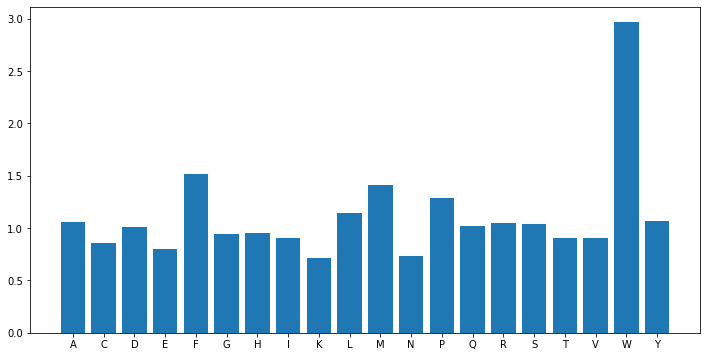

In [18]:
%pylab inline

pylab.rcParams['figure.figsize'] = (12, 6)
aminoacids = df_grouped.columns

cytoplasm_mean_composition = df_grouped.loc[0]
membrane_mean_composition  = df_grouped.loc[1]

relative_difference = membrane_mean_composition / cytoplasm_mean_composition

plt.bar(aminoacids, relative_difference)
plt.show()

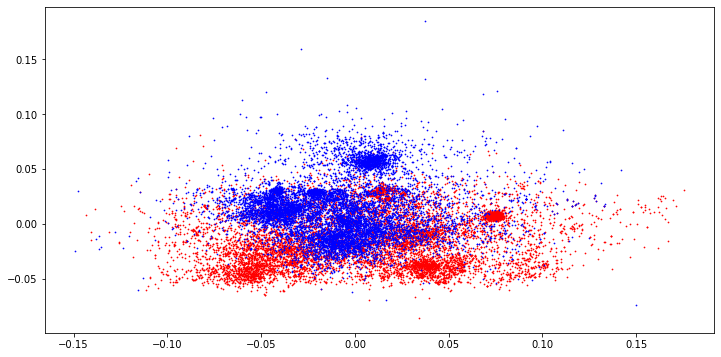

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(df.drop(['membrane'], axis=1))

for group, df_group in df.groupby('membrane'):
    components = pca.transform(df_group.drop('membrane', axis=1))
    plt.scatter(
        components[:,0],
        components[:,1],
        s=0.5,
        label='Membrane' if group == 0 else 'Cytoplasm',
        color='red' if group == 0 else 'blue'
    )

plt.show()

## Model Training

In [21]:
from sklearn.model_selection import train_test_split

X = df.drop(['membrane'], axis=1)
y = df['membrane']

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [22]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

## Model Validation

In [23]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      2485
           1       0.94      0.96      0.95      2515

    accuracy                           0.95      5000
   macro avg       0.95      0.95      0.95      5000
weighted avg       0.95      0.95      0.95      5000

